In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('hack4ghana/Train.csv', index_col= 0)

In [3]:
data.head()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
ID,,,,,,,,,,,,,,,
ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [4]:
data['Label'].value_counts()

Label
0    6504
1    2404
Name: count, dtype: int64

Resolving Class Imbalance

In [5]:
true_minority = data[data['Label'] == 1]

In [6]:
false_majority = data[data['Label'] == 0]

In [7]:
from sklearn.utils import resample
resampled_minority = resample(true_minority, replace = True, n_samples= 6505, random_state= 42)

In [8]:
resampled_minority.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6505 entries, ID_VO2PYJ7ROZ to ID_0AMC9LY7J8
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   I/O Data Operations       6505 non-null   float64
 1    I/O Data Bytes           6505 non-null   float64
 2   Number of subprocesses    6505 non-null   float64
 3   Time on processor         6505 non-null   float64
 4   Disk Reading/sec          6505 non-null   float64
 5   Disc Writing/sec          6505 non-null   float64
 6   Bytes Sent/sent           6505 non-null   float64
 7   Received Bytes (HTTP)     6505 non-null   float64
 8   Network packets sent      6505 non-null   float64
 9   Network packets received  6505 non-null   float64
 10  Pages Read/sec            6505 non-null   float64
 11  Pages Input/sec           6505 non-null   float64
 12  Page Errors/sec           6505 non-null   float64
 13  Confirmed byte radius     6505 non-null   float

In [9]:
new_data = pd.concat([resampled_minority, false_majority])

In [10]:
new_data['Label'].value_counts()

Label
1    6505
0    6504
Name: count, dtype: int64

Checking statistical significance of all features

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def feature_distribution(feature, label, df):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(data = df, x = label, y = feature, ax = ax)
    
    return plt.plot()

In [13]:
columns = data.columns.drop('Label')

In [14]:
columns

Index(['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses',
       'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
       'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent',
       'Network packets received', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

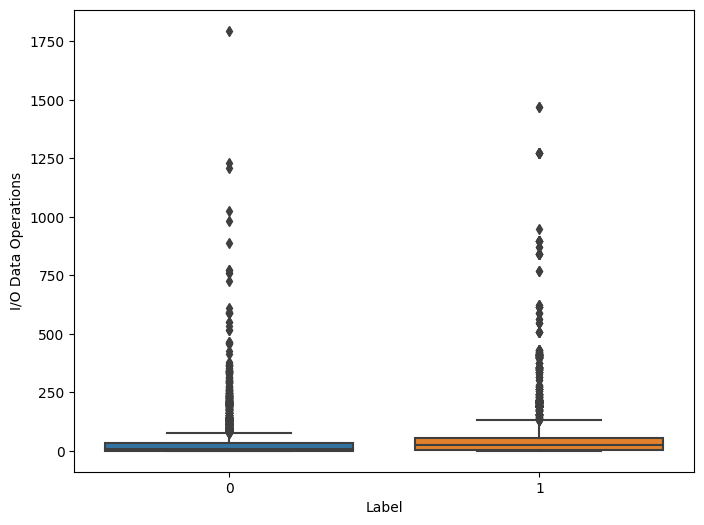

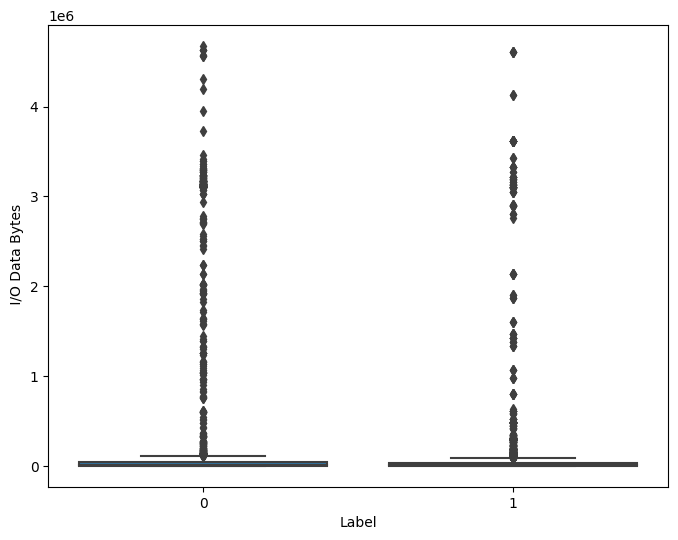

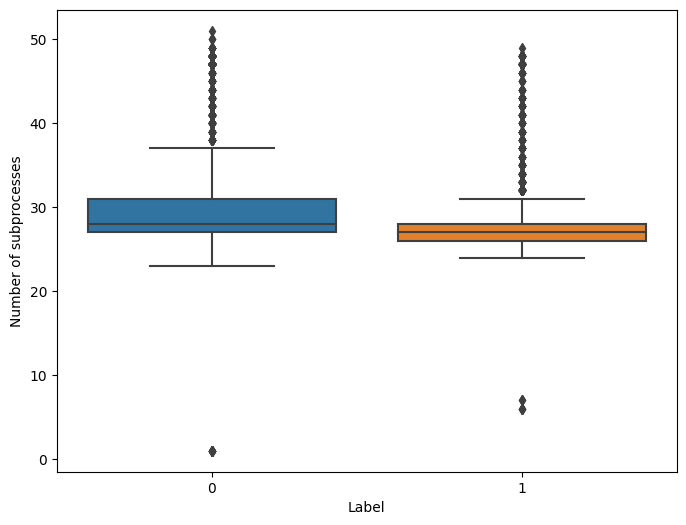

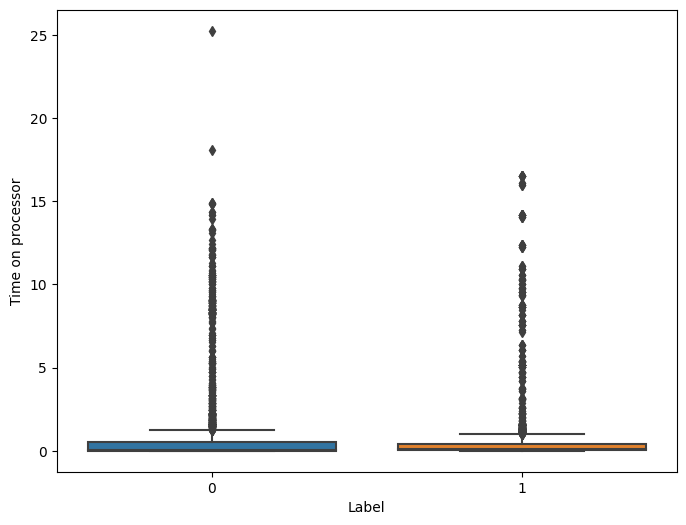

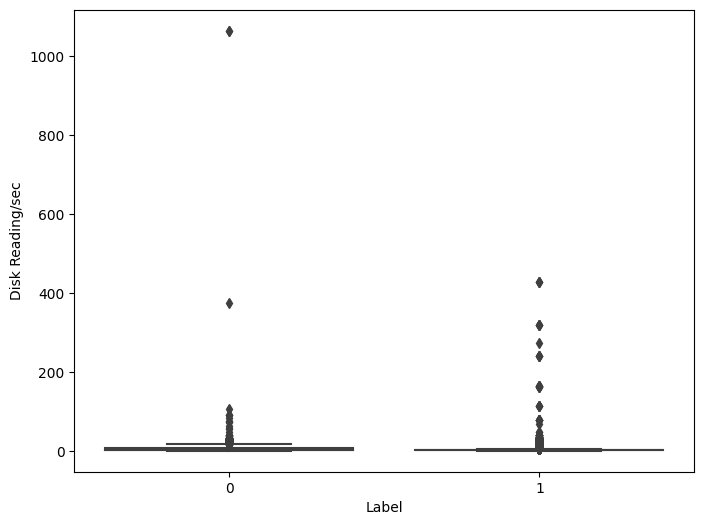

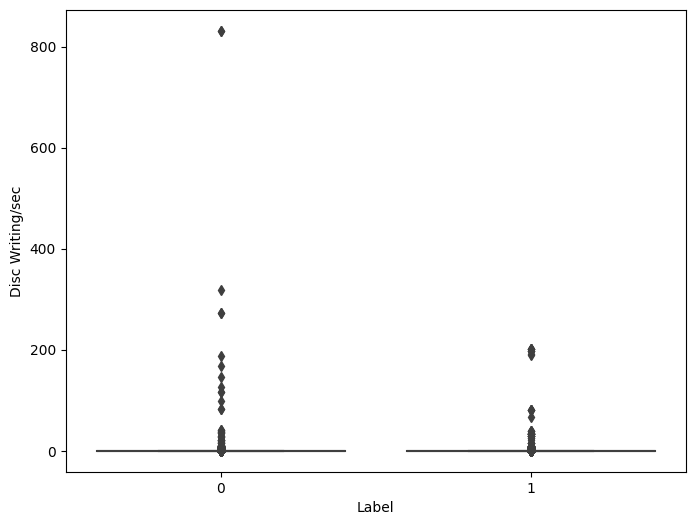

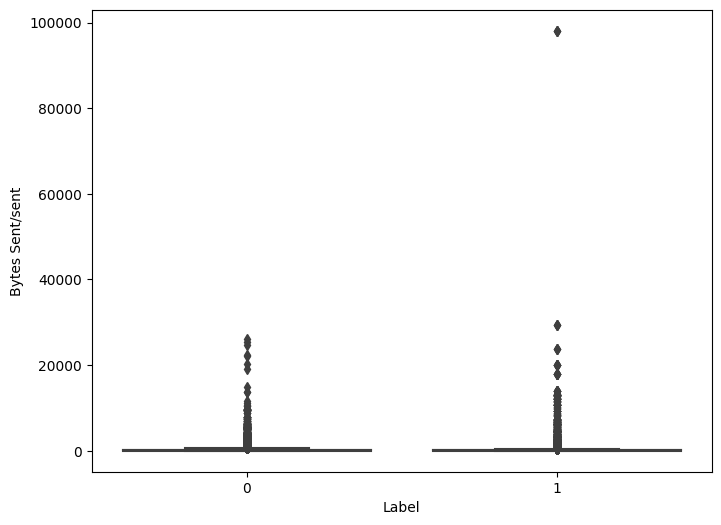

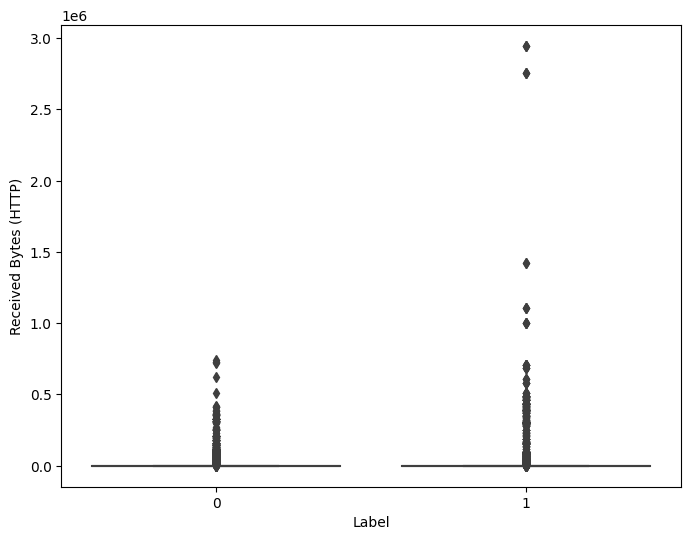

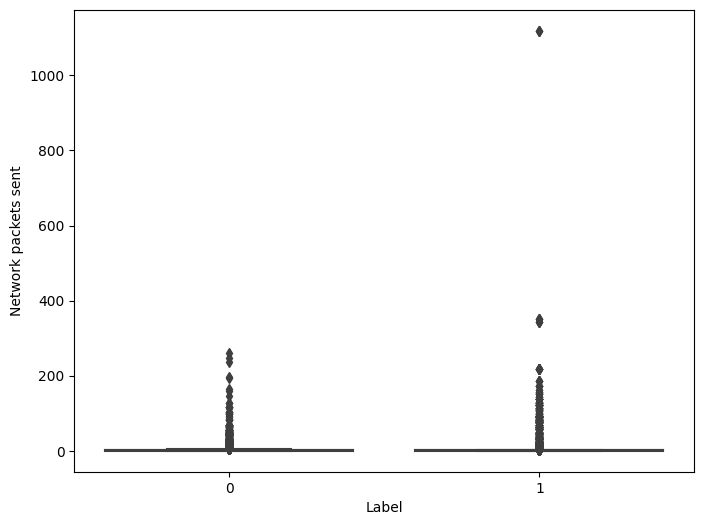

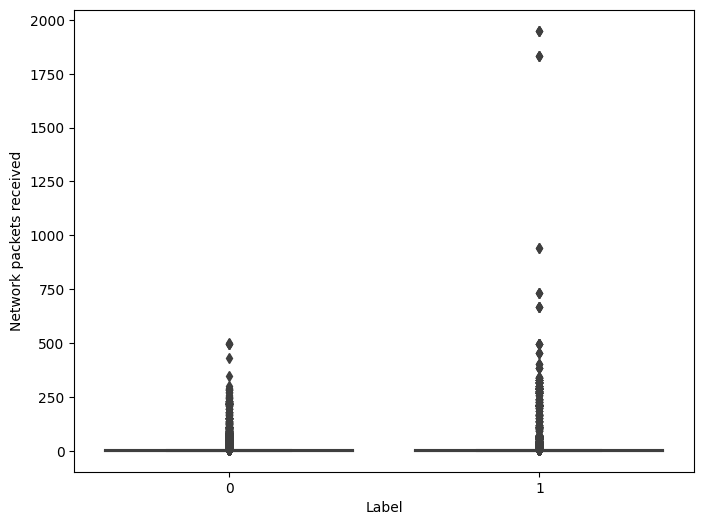

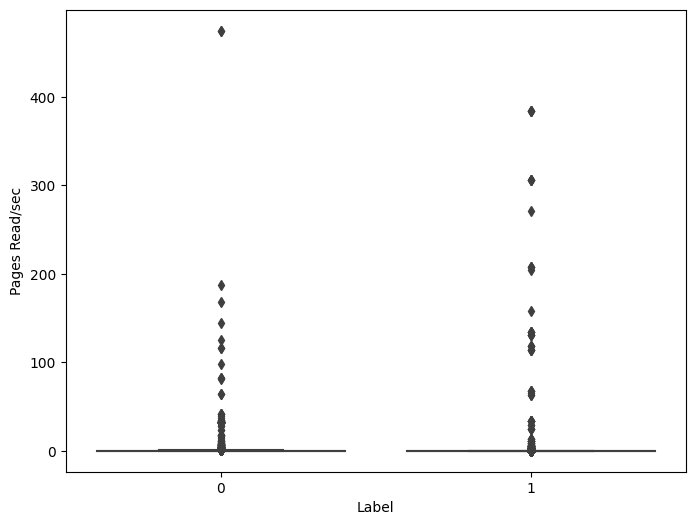

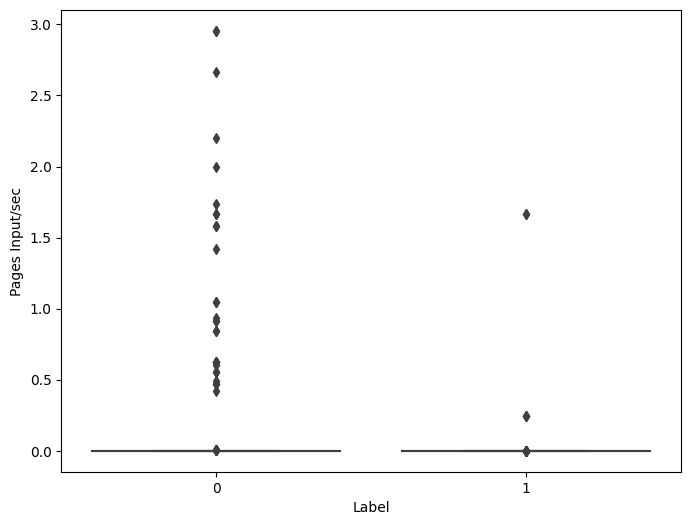

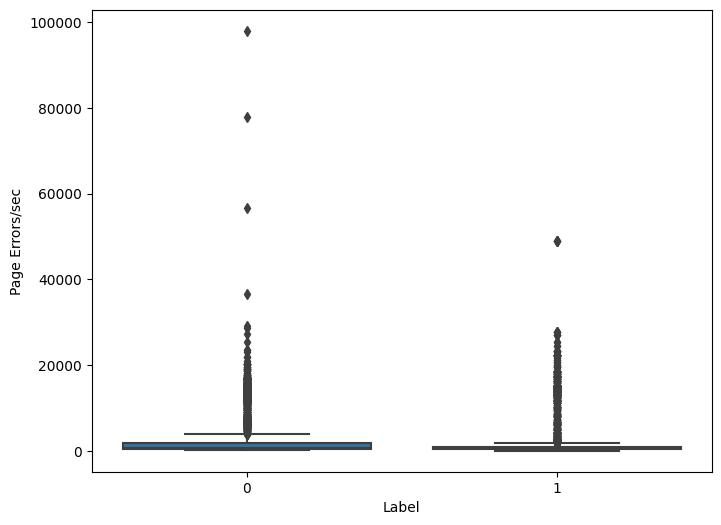

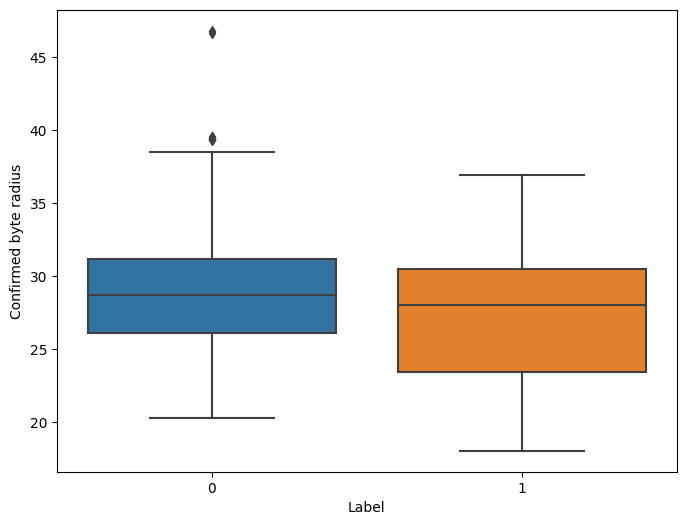

In [15]:
for i in columns:
    feature_distribution(i, 'Label', new_data)

Removing statistically insignificant features

In [16]:
from scipy.stats import f_oneway
anova_results = []
for feature in columns:
    # separate the data for the two groups
    genuine = new_data.loc[data['Label'] == 1, feature]
    fake = new_data.loc[data['Label'] == 0, feature]
    
    # perform ANOVA
    f_statistic, p_value = f_oneway(genuine, fake)
    
    # append the results to the list
    anova_results.append({'Feature': feature, 'F-Statistic': f_statistic, 'p-value': p_value})


anova_df = pd.DataFrame(anova_results)

In [17]:
anova_df

,Feature,F-Statistic,p-value
0,I/O Data Operations,160.230945,1.653505e-36
1,I/O Data Bytes,40.304135,2.245707e-10
2,Number of subprocesses,648.081580,1.481035e-139
3,Time on processor,10.355301,1.294198e-03
4,Disk Reading/sec,53.339895,2.968776e-13
5,Disc Writing/sec,2.871141,9.020487e-02
6,Bytes Sent/sent,0.758389,3.838492e-01
7,Received Bytes (HTTP),31.859378,1.692117e-08
8,Network packets sent,16.340839,5.321606e-05
9,Network packets received,23.058296,1.589137e-06


In [18]:
valid_features = anova_df[anova_df['p-value'] > 0.05]

In [19]:
valid_features

,Feature,F-Statistic,p-value
5,Disc Writing/sec,2.871141,0.090205
6,Bytes Sent/sent,0.758389,0.383849
10,Pages Read/sec,2.382586,0.122719


In [20]:
valid_columns = valid_features['Feature'].unique()

In [21]:
valid_columns

array(['Disc Writing/sec', 'Bytes Sent/sent', 'Pages Read/sec'],
      dtype=object)

In [22]:
non_feature_list = valid_columns.tolist()

In [23]:
train = new_data.drop(non_feature_list, axis = 1)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13009 entries, ID_VO2PYJ7ROZ to ID_LVH8ZOJXLJ
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   I/O Data Operations       13009 non-null  float64
 1    I/O Data Bytes           13009 non-null  float64
 2   Number of subprocesses    13009 non-null  float64
 3   Time on processor         13009 non-null  float64
 4   Disk Reading/sec          13009 non-null  float64
 5   Received Bytes (HTTP)     13009 non-null  float64
 6   Network packets sent      13009 non-null  float64
 7   Network packets received  13009 non-null  float64
 8   Pages Input/sec           13009 non-null  float64
 9   Page Errors/sec           13009 non-null  float64
 10  Confirmed byte radius     13009 non-null  float64
 11  Label                     13009 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.8+ MB


In [25]:
train.to_csv('cleaned_data.csv')

First submission